#1 - K-Means

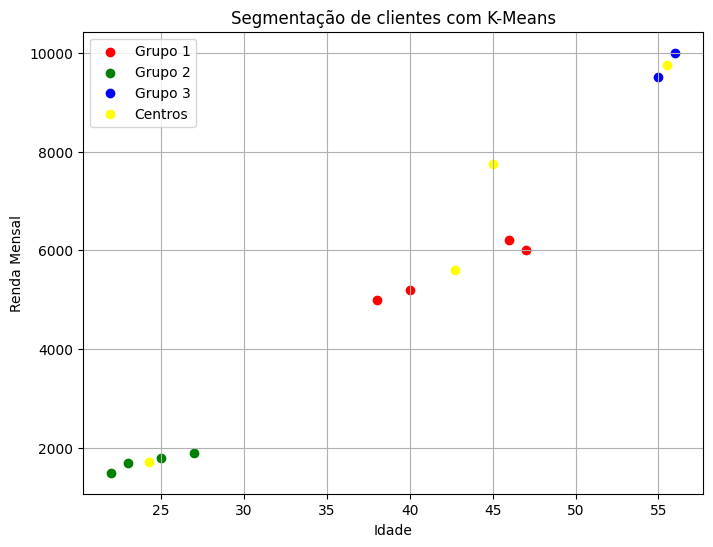

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 38, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})
# segmenta os dados em grupos
# Aplicando K-Means com 3 grupos (K=3)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dados)

#Adicionando o rótulo do grupo (cluster) a cada cliente
dados['Grupo'] = kmeans.labels_

#Visualização dos grupos
cores = ['red', 'green', 'blue']
plt.figure(figsize=(8,6))
for i in range(3):
  grupo = dados[dados['Grupo'] == i]
  plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

#adicionar os centros dos clusters
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:,1], c='yellow', label='Centros')
plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title('Segmentação de clientes com K-Means')
plt.legend()
plt.grid(True)
plt.show()

#Entendendo visualmente a quantidade ideal

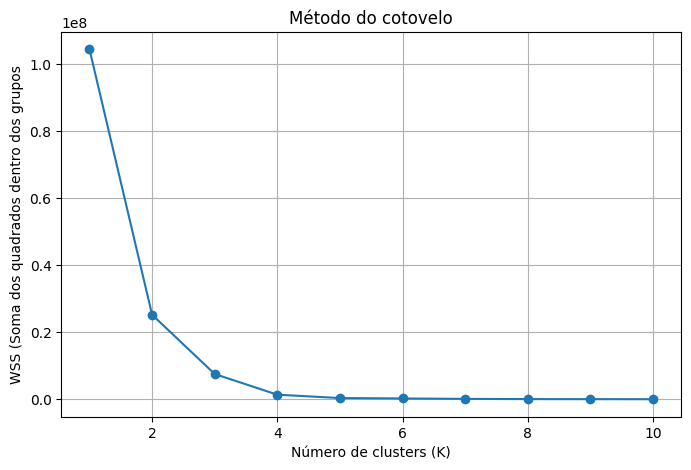

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 38, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---- técnica usada para determinar o número ideal de clusters(k) em uma análise de agrupamento(clustering)
wss = [] # Whitin-Cluster Sum of Squares (Soma dos quadrados dentro dos clusters)
#cluster: grupo/conjuto de elementos que são semelhantes entre si.

# Testando K=1 a K=10
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(dados)
  wss.append(kmeans.inertia_)
  # adiciona à lista wss o valor -inertia: soma das distâncias quadráticas entre cada ponto de dado e o centro do cluster

#Plot do gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wss, marker='o')
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WSS (Soma dos quadrados dentro dos grupos')
plt.grid(True)
plt.show()

In [ ]:
pip install kneed #ferramenta para identificar automaticamente o cotovelo(joelho-knee)

Número ideal de clusters (K): 3


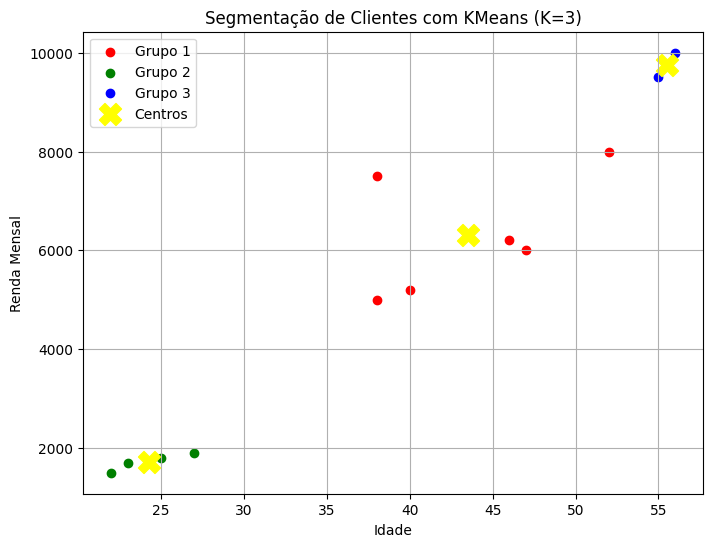

Sillhouette Score: 0.68


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 38, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---- técnica usada para determinar o número ideal de clusters(k) em uma análise de agrupamento(clustering)
wss = [] # Whitin-Cluster Sum of Squares (Soma dos quadrados dentro dos clusters)
#cluster: grupo/conjuto de elementos que são semelhantes entre si.
K_range = range(1,11)

# Testando K=1 a K=10
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(dados)
  wss.append(kmeans.inertia_)
  # adiciona à lista wss o valor -inertia: soma das distâncias quadráticas entre cada ponto de dado e o centro do cluster

#Encontrando automaticamente o cotovelo
kl = KneeLocator(K_range, wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters (K): {k_ideal}')

# --- Etapa 2: Aplicando o KMeans com o K ideal ---
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
dados['Grupo'] = kmeans_final.fit_predict(dados)

# ---Etapa 3: Visualizando os grupos ---
plt.figure(figsize=(8,6))
cores = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

for i in range(k_ideal):
  grupo = dados[dados['Grupo'] == i]
  plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

#Centros dos clusters
centros = kmeans_final.cluster_centers_
plt.scatter(centros[:,0], centros[:,1], s=250, c='yellow', marker='X', label='Centros')

plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title(f'Segmentação de Clientes com KMeans (K={k_ideal})')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score
score = silhouette_score(dados, kmeans_final.labels_)
print(f'Sillhouette Score: {score:.2f}') #verificar qualidade dos clusters obtidos

In [ ]:
'''
Silhouette Score (Coeficiente de Silhueta)
Mede o quão bem cada ponto está no seu cluster em comparação com os clusters
vizinhos.

Varia de -1 a 1:

🟢 Perto de 1 → ponto bem agrupado.

🟡 Perto de 0 → ponto na fronteira entre clusters.

🔴 Negativo → ponto pode estar no cluster errado.
'''

In [ ]:
'''
Tema do Projeto: Segmentação de Clientes com K-Means
Base de Dados:
Usaremos a base "Mall Customers", com dados de clientes de um shopping center. Ela contém:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Link direto para o dataset:
'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
'''

In [ ]:
pip install kneed

In [ ]:
#Correção do mini-projeto K-Means
#1. Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kneed import KneeLocator

# 2. Carregar dados
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
df = pd.read_csv(url)

# 3. EDA básica - Análise Exploratória de Dados
print(df.head())
print(df.describe())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

Número ideal de clusters: 4
Silhouette Score: 0.404


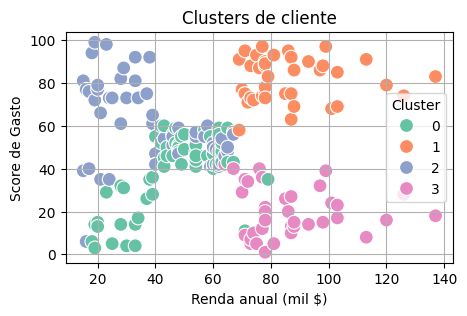

In [ ]:
#ETL: Extrair, Transformar e Carregar
# 4.Pré-processamento
#Vamos usar Age, Income e Spending Score
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#5. Escalonamento
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#6. Método do cotovelo + escolha automática
wss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  wss.append(kmeans.inertia_)

kl = KneeLocator(range(1,11), wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters: {k_ideal}')

# 7. Aplicar K-Means
kmeans = KMeans(n_clusters=k_ideal, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

# 8. Avaliação
silhouette = silhouette_score(x_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette:.3f}')

# 9. Visualização dos clusters
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters de cliente')
plt.xlabel('Renda anual (mil $)')
plt.ylabel('Score de Gasto')
plt.grid(True)
plt.show()

2 - Hierarchical Clustering (Agrupamento Hierárquico)

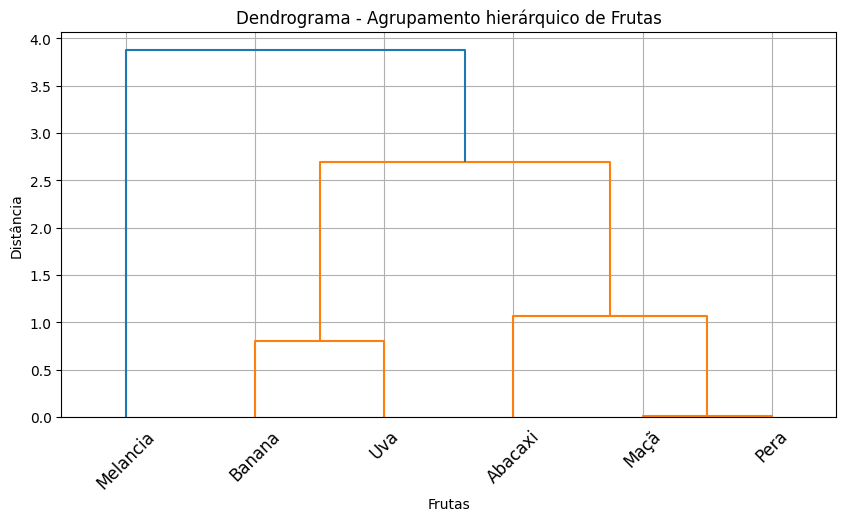

Silhouette Score: 0.479
      Fruta  Peso  Doçura  Grupo
0      Maçã   150       6      2
1      Pera   160       6      2
2    Banana   120       8      1
3   Abacaxi  1000       7      2
4  Melancia  5000       9      3
5       Uva     5       9      1


In [3]:
#Agrupar dados em uma estrutura hierárquica, explorar diferentes níveis de agrupamento, não precisa especificar nº de clusters, visualizar a rela
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

dados = pd.DataFrame({
    'Fruta': ['Maçã', 'Pera', 'Banana', 'Abacaxi', 'Melancia', 'Uva'],
    'Peso': [150, 160, 120, 1000, 5000, 5],
    'Doçura': [6, 6, 8, 7, 9, 9]
})

# Separando os dados numéricos
x = dados[['Peso','Doçura']]

# Padronizá-los (z-score)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Criando um modelo de agrupamento hierarquico (linkage)
linked = linkage(x_scaled, method='ward') #método mais utilizado - minimiza a variância dentro de cada cluster

# Plotando o dendrograma
plt.figure(figsize=(10,5))
dendrogram(linked,
           labels=dados['Fruta'].values,
           distance_sort='ascending',
           leaf_rotation=45)
plt.title('Dendrograma - Agrupamento hierárquico de Frutas')
plt.xlabel('Frutas')
plt.ylabel('Distância')
plt.grid()
plt.show()

# Definir os grupos finais (ex.: 3 grupos)
grupos = fcluster(linked, 3, criterion='maxclust') #define o máximo de clusters desejado
dados['Grupo'] = grupos

#Calcular Shillhouette Score
score = silhouette_score(x_scaled, grupos)
print(f'Silhouette Score: {score:.3f}')

#Exibir os dados dos grupos atribuídos
print(dados)



DBSCAN - Density-Based Spatial Clustering of Applications with Noise


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
#agrupa pontos de dados densamente  agrupados, ajuda a identificar ruídos(outliers)


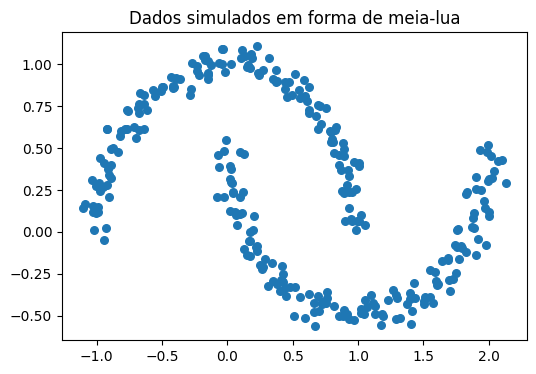

In [6]:
# Criar os dados em formato de meia-lua
x, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualizar os dados
plt.figure(figsize=(6, 4))
plt.scatter(x[:, 0], x[:, 1], s=30)
plt.title("Dados simulados em forma de meia-lua")
plt.show()

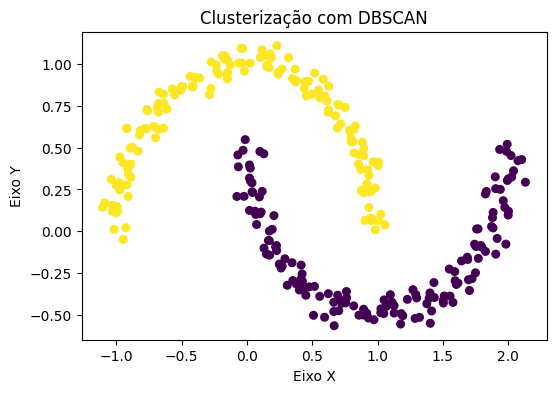

In [11]:
#Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(x)

#Visualizar o resultado
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=30)
plt.title('Clusterização com DBSCAN')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()
